# Chapter 5: 트리 알고리즘

## 5-1 걸정 트리

### 로지스틱 회귀로 와인 분류

In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.columns

Index(['alcohol', 'sugar', 'pH', 'class'], dtype='object')

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- Non-Null Count : 6497이므로 누락된 값은 없는 것같아.

In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


### 정리해보면
- 6497개의 샘플
- mean : 평균
- std : 표준편차
- min : 최소값
- 25% : 1사분위수
- 50% : 2사분위수
- 75% : 3사분위수
- max : 최대값

In [6]:
wine['class'].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

<Axes: xlabel='class'>

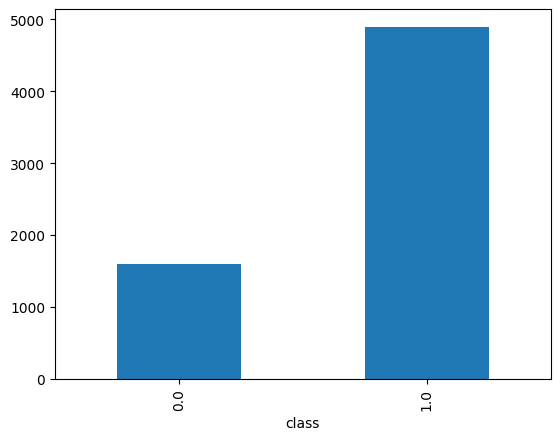

In [7]:
wine['class'].value_counts().sort_index().plot(kind='bar')


In [8]:
wine.isnull().sum()

alcohol    0
sugar      0
pH         0
class      0
dtype: int64

### class 0이면 레드 와인, 1이면 화이트 와인
- alcohol : 알콜 도수
- sugar : 당도
- pH : 산도
=> 이진 분류 문제 ( 화이드 와인 vs 레드 와인 )
- class : 레드와인(0), 화이트와인(1)
- 화이트 1이라서 화이트 와인이 양성 클래스이다.

### 훈련하기 전에 데이터를 배열 형태로 변환

In [9]:
X = wine[['alcohol', 'sugar', 'pH']].to_numpy()
y = wine['class'].to_numpy()

In [10]:
X[:5]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [11]:
y[:5]

array([0., 0., 0., 0., 0.])

In [12]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 3), (5197,), (1300, 3), (1300,))

In [13]:
# 데이터 전차리 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
# 모델 평가
print(log_reg.score(X_train_scaled, y_train))
print(log_reg.score(X_test_scaled, y_test))



0.7808350971714451
0.7776923076923077


In [16]:
print(log_reg.coef_, log_reg.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


## 걸정 트리

In [17]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
# 모델 평가
print(tree_clf.score(X_train, y_train))
print(tree_clf.score(X_test, y_test))


0.996921300750433
0.8584615384615385


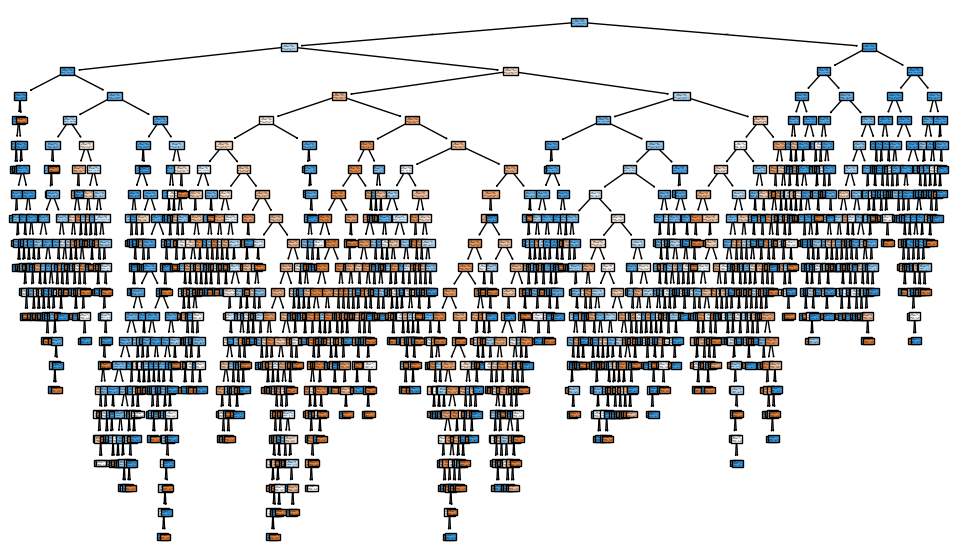

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 7))
plot_tree(tree_clf, filled=True, feature_names=['alcohol', 'sugar', 'pH'], class_names=['red', 'white'])
plt.show()

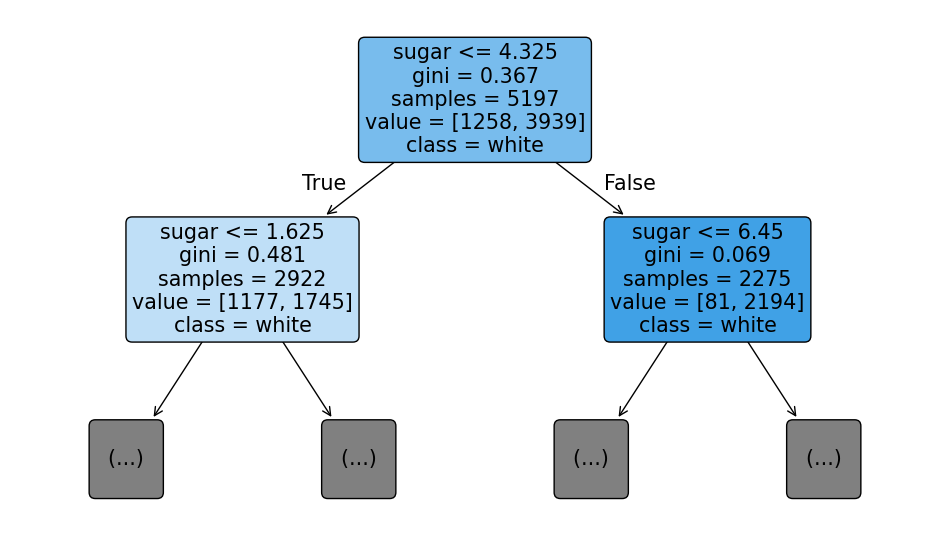

In [20]:
plt.figure(figsize=(12, 7))
plot_tree(tree_clf, filled=True, feature_names=['alcohol', 'sugar', 'pH'], class_names=['red', 'white'], rounded=True, max_depth=1)
plt.show()

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTvgYltu2Y86a_KgEIId1vOIGvHHBj85i-_5Q&s">

<img src="https://blog.kakaocdn.net/dn/dTCKb4/btrtb1X2Ai4/KkDOKkHNVvlIJhOuPKJuj0/img.png">

In [21]:
dee_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
dee_tree.fit(X_train_scaled, y_train)
print(dee_tree.score(X_train_scaled, y_train))
print(dee_tree.score(X_test_scaled, y_test))


0.8454877814123533
0.8415384615384616


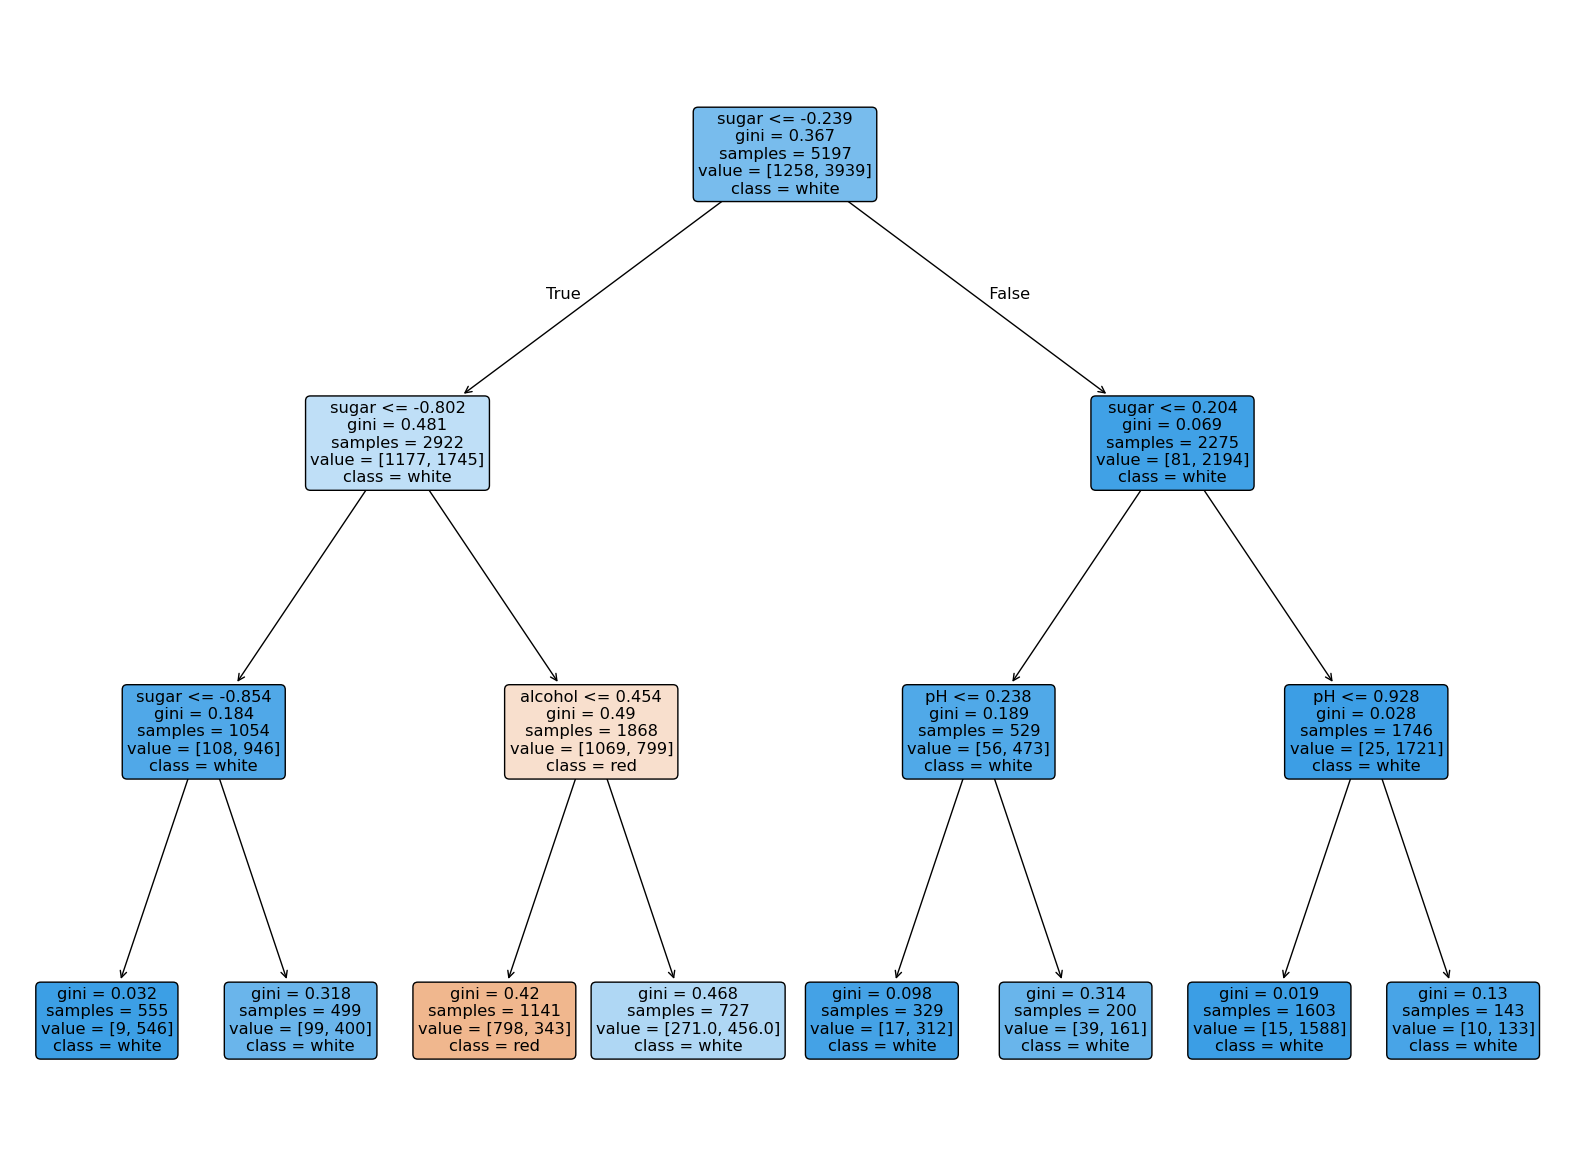

In [22]:
plt.figure(figsize=(20, 15))
plot_tree(dee_tree, filled=True, feature_names=['alcohol', 'sugar', 'pH'], class_names=['red', 'white'], rounded=True)
plt.show()


In [23]:
dee_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
dee_tree.fit(X_train_scaled, y_train)
print(dee_tree.score(X_train_scaled, y_train))
print(dee_tree.score(X_test_scaled, y_test))


0.8454877814123533
0.8415384615384616


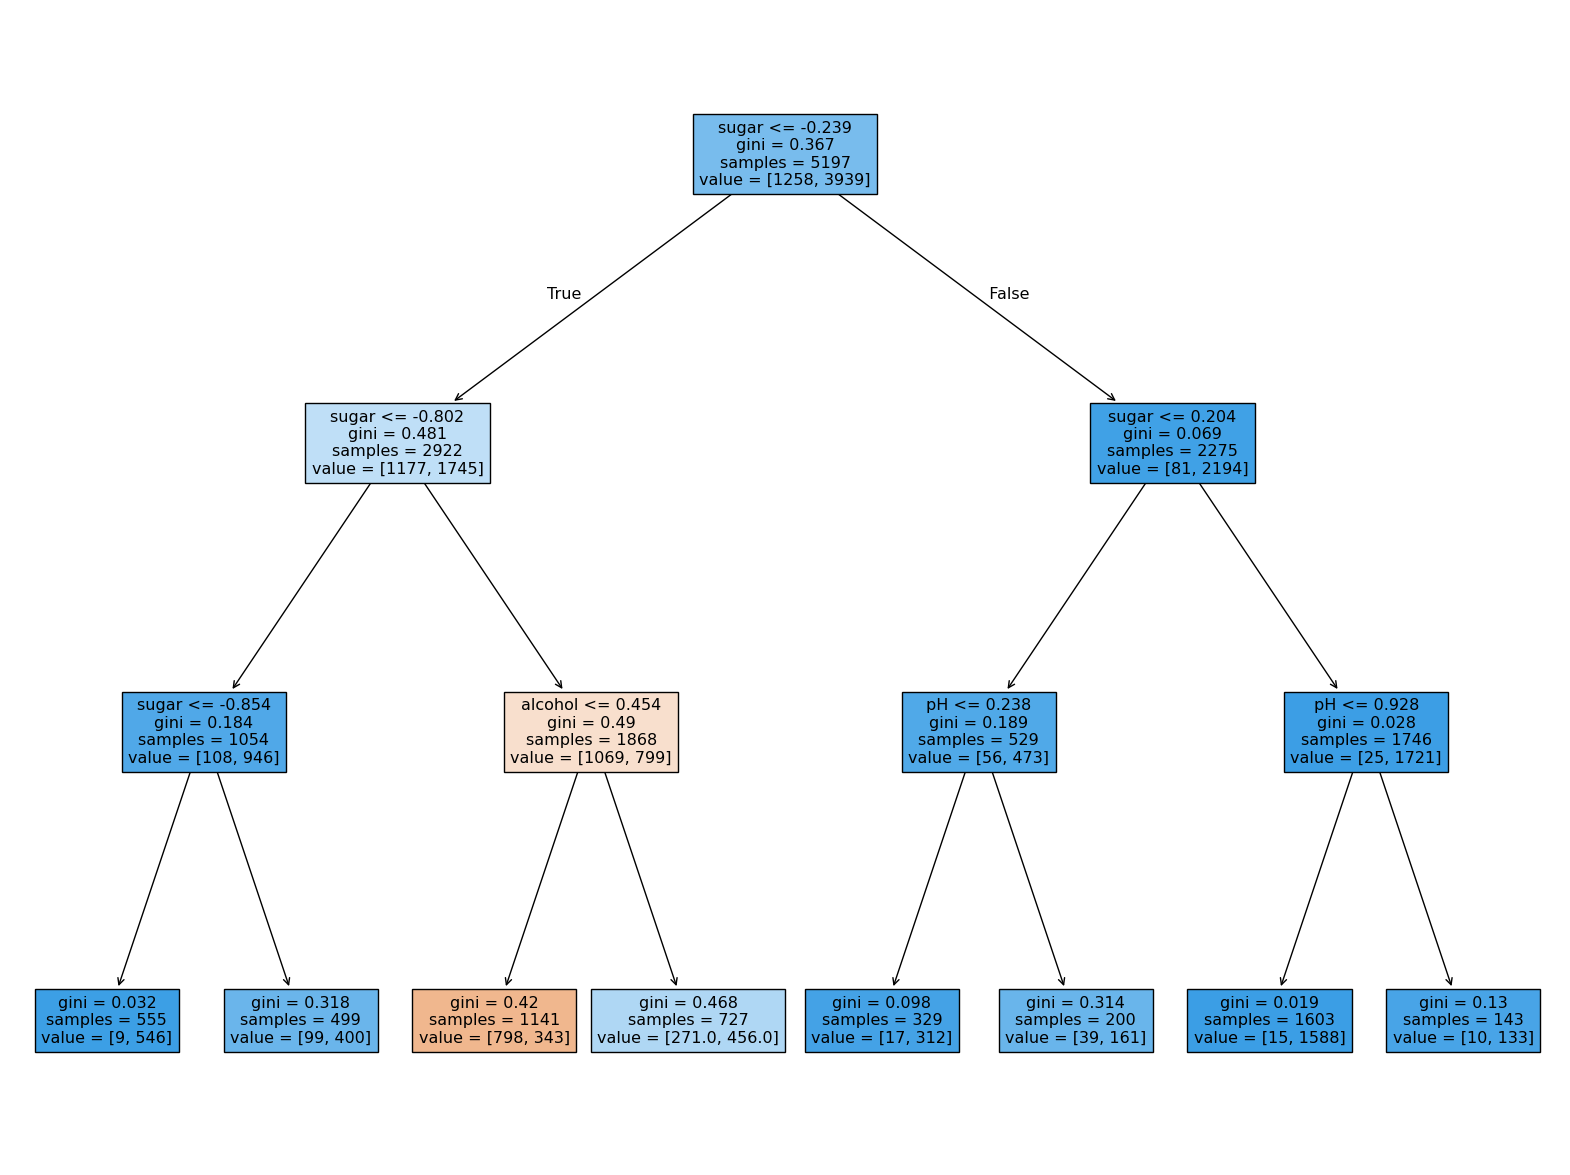

In [24]:
plt.figure(figsize=(20, 15))
plot_tree(dee_tree, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [25]:
print(dee_tree.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


## 5-2 교차 검증 그리트 서치

In [26]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [27]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [28]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)


In [30]:
sub_input, val_input, sub_target, val_target = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [32]:
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [33]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


### 교차 검증
<img src="https://velog.velcdn.com/images/changh2_00/post/7c8ac302-02b0-41ba-8c8d-2f4952503a23/image.jpeg">

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X_train, y_train, cv=3, scoring='accuracy')
print(scores)

[0.84535488 0.87182448 0.84757506]


In [36]:
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, X_train, y_train, cv=3, scoring='accuracy')
print(scores)

{'fit_time': array([0.00502706, 0.00518107, 0.00399923]), 'score_time': array([0.00099921, 0.00100017, 0.00100207]), 'test_score': array([0.84535488, 0.87182448, 0.84757506])}


In [37]:
import numpy as np

print(np.mean(scores['test_score']))

0.8549181380146386


In [42]:
from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, X_train, y_train, cv=StratifiedKFold(), scoring='accuracy')
print(np.mean(scores['test_score']))

0.855300214703487


In [43]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=splitter, scoring='accuracy')
print(np.mean(scores['test_score']))

0.8574181117533719


### 하이퍼파라미터 튜닝

In [44]:
from sklearn.model_selection import GridSearchCV
param_grid = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

In [45]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)

In [46]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [47]:
dt =gs.best_estimator_
print(dt.score(X_train, y_train))

0.9615162593804117


In [1]:
from IPython.display import HTML

HTML('''
<div style="display: flex; justify-content: center; align-items: center; height: 700px;">
  <iframe src="https://maxo.tistory.com/69" width="1920" height="1080" style="border: none;"></iframe>
</div>
''')
